## Imported Python Libraries

In [ ]:
import numpy as np
import numpy.linalg as nplin
import matplotlib.pyplot as plt
import scipy as sp
import scipy.constants

## Some Constants Used

In [ ]:
#Some constants!
h_bar = 1 # here we take as 1 from lecture
pi = scipy.constants.pi




## QUESTION 0: Time-Independent Hamiltonian under RWA

In [ ]:
# Initiliazing some variables
omega_light = 10; #this the ω in the paper
light_energy = h_bar*omega_light # This is ℏω

#this is the ω0 in the paper
omega_zero_values = omega_light*np.linspace(0.5,1.5, 100); 

quasienergies_1 = [] # To store the first quasienergies
quasienergies_2 = [] # To store the second quasienergies
omega_zero_plot = [] # To store the ω0 used to plot the figure

E = light_energy*0.2 # The value the coupling strength E 
#(note: need to consider the 3 cases mentioned in the report)


for i in range(np.size(omega_zero_values)):
  omega_zero = omega_zero_values[i] # Values of ω0 in the array of ω0
  atom_energy = (h_bar*omega_zero)/2 # this is (ℏ*ω0)/2
  omega_zero_plot.append(2*atom_energy)

  # Making the time-independent under RWA Hamiltonian Matrix
  time_indep_hamiltonian = np.matrix([[-atom_energy+light_energy, E/2], 
                                      [E/2, atom_energy]]); 

  #Finding the eigenvalue and eigenvector of the Hamiltonian operator
  evalue, evector = nplin.eig(time_indep_hamiltonian)
  for j in range(np.size(evalue)-1):
    
    if(evalue[j] > evalue[j+1]):
      quasienergies_1.append(evalue[j+1])
      quasienergies_2.append(evalue[j])
    else:
      quasienergies_1.append(evalue[j])
      quasienergies_2.append(evalue[j+1])
    

In [ ]:
## Checking the obtained eigenvector if it is correct or wrong
print(evalue[0]*evector[:,0])

print(time_indep_hamiltonian@evector[:,0])

print(evector[:,0])

In [ ]:
## Plotting the obtained values
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

fig = plt.figure()
plt.scatter(omega_zero_plot, quasienergies_1, 10)
plt.scatter(omega_zero_plot, quasienergies_2, 10)

plt.xlabel("ℏω_0")
plt.ylabel("Quasienergies")

plt.savefig("plot.png")
files.download("plot.png") 

plt.show()






## Finding the cut-off value (N) for the Fourier series



In [ ]:
#### Making the empty matrix

n_array = []
quasienergies  = []

for n in range(1, 100):
  n_array.append(n)
  row_size = 2*(2*n+1)
  col_size = 2*(2*n+1)


  #### Some variables for the Floquet Hamiltonian

  omega_light = 10; #this the ω in the paper
  light_energy = h_bar*omega_light # This is ℏω

  omega_zero = omega_light*0.8 ; # This is ω0 
  atom_energy= (h_bar*omega_zero)/2 # this is the bunch of values of (ℏ*ω0)/2

  E = light_energy*10 # This is E for the coupling strength

  # Making the E/2 diagonal terms
  E_diagonal_array = np.zeros(col_size-1)
  for i in range(col_size-1):
    if(i%2 == 0):
      E_diagonal_array[i]=0
    else:
      E_diagonal_array[i]=E/2

  # Making the second E/2 diagonal terms
  E_sec_diagonal_array = np.zeros(col_size-3);
  for i in range(col_size-3):
    if(i%2 == 0):
      E_sec_diagonal_array[i]= E/2
    else:
      E_sec_diagonal_array[i]= 0

  # Making the diagonal array for the terms in the Floquet Hamiltonian
  count = n

  H_diagonal_array = np.zeros(col_size)
  for i in range(col_size):
    if(i%2 == 0):
      H_diagonal_array[i] = atom_energy+(count*light_energy) 
    else:
      H_diagonal_array[i] = (-1*atom_energy)+(count*light_energy)
      count -= 1

  # Creating the Floquet Hamiltonian Matrix by adding all the diagonal terms
  H_floquet_matrix = (np.diag(H_diagonal_array)+np.diag(E_diagonal_array, k = 1) 
  + np.diag(E_diagonal_array, k = -1)+np.diag(E_sec_diagonal_array, k = 3)
  +np.diag(E_sec_diagonal_array, k = -3))

  # Finding the eigenvalue and eigenvector
  evalue, evector = nplin.eig(H_floquet_matrix)

  # Constraining the obtained eigenvalues to be 
  # within the mentioned boundaries in the report
  for i in range(np.size(evalue)):
    if((-light_energy/2 < evalue[i]) and (evalue[i] < light_energy/2)):
      quasienergies.append(evalue[i])



# Separating the two obtained quasienergies to two different arrays
quasienergies_plot_1 = []
quasienergies_plot_2 =[]
for i in range(0, (np.size(quasienergies)-1), 2):
  if(quasienergies[i] < quasienergies[i+1]):
    quasienergies_plot_1.append(quasienergies[i])
    quasienergies_plot_2.append(quasienergies[i+1])
  else:
    quasienergies_plot_1.append(quasienergies[i+1])
    quasienergies_plot_2.append(quasienergies[i])


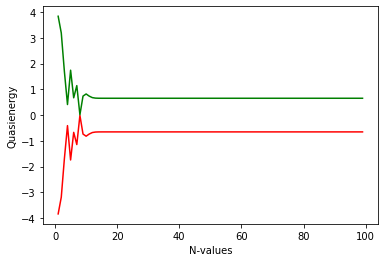

In [ ]:
# Plotting the obtained values
import matplotlib.pyplot as plt
from google.colab import files

plt.xlabel("N-values")
plt.ylabel("Quasienergy")

plt.plot(n_array, quasienergies_plot_1,  color="red")
plt.plot(n_array, quasienergies_plot_2, color="green")

# plt.savefig("cutoff_E_mul_10_lines.png")
# files.download("cutoff_E_mul_10_lines.png") 

plt.show()


## QUESTION 1

In [ ]:
#### Making the empty matrix

n = 60 # The value of the cut-off for the Fourier series
row_size = 2*(2*n+1) # The size of the row of the Floquet Hamiltonian Matrix
col_size = 2*(2*n+1) # The size of the column of the Floquet Hamiltonian Matrix


#### Some variables for the Floquet Hamiltonian

omega_light = 10; #this the ω in the paper
light_energy = h_bar*omega_light # This is ℏω

omega_zero_values = omega_light*np.linspace(0,6, 100); #Generate some ω0 values
atom_energy_values = (h_bar*omega_zero_values)/2 # this is the bunch of values 
                                                #of (ℏ*ω0)/2

omega_zero_spacing = np.size(omega_zero_values) # This is for how many ω0 values 
                                                #aree there

E = light_energy*0.2 # This is E for the coupling strength

# To store the values of the ω0 and Є1 and Є2
omega_zero_array = []
quasienergies  = []

## Contructing the Floquet Hamiltonian Matrix and generating 
## the quasienergies values with different ω0 values
for i in range(omega_zero_spacing):
  atom_energy = atom_energy_values[i]

  # Making the E/2 diagonal terms
  E_diagonal_array = np.zeros(col_size-1)
  for i in range(col_size-1):
    if(i%2 == 0):
      E_diagonal_array[i]=0
    else:
      E_diagonal_array[i]=E/2

  # Making the second E/2 diagonal terms
  E_sec_diagonal_array = np.zeros(col_size-3);
  for i in range(col_size-3):
    if(i%2 == 0):
      E_sec_diagonal_array[i]= E/2
    else:
      E_sec_diagonal_array[i]= 0

  # Making the diagonal array for the terms in the Floquet Hamiltonian
  count = n

  H_diagonal_array = np.zeros(col_size)
  for i in range(col_size):
    if(i%2 == 0):
      H_diagonal_array[i] = atom_energy+(count*light_energy) 
    else:
      H_diagonal_array[i] = (-1*atom_energy)+(count*light_energy)
      count -= 1

  # Creating the Floquet Hamiltonian Matrix by adding all the diagonal terms
  H_floquet_matrix = (np.diag(H_diagonal_array)+np.diag(E_diagonal_array, k = 1)
  + np.diag(E_diagonal_array, k = -1)+np.diag(E_sec_diagonal_array, k = 3)
  +np.diag(E_sec_diagonal_array, k = -3))
  
  # Finding the eigenvalue and eigenvector
  evalue, evector = nplin.eig(H_floquet_matrix)

  # Constraining the obtained eigenvalues to be within 
  # the mentioned boundaries in the report
  omega_zero_array.append(2*atom_energy)
  for i in range(np.size(evalue)):
    if((-light_energy/2 < evalue[i]) and (evalue[i] < light_energy/2)):
      quasienergies.append(evalue[i])
      


# Separating the two quasienergy from the combined quasienergy array
quasienergies_plot_1 = []
quasienergies_plot_2 =[]
for i in range(0, (np.size(quasienergies)-1), 2):
  if(quasienergies[i] < quasienergies[i+1]):
    quasienergies_plot_1.append(quasienergies[i])
    quasienergies_plot_2.append(quasienergies[i+1])
  else:
    quasienergies_plot_1.append(quasienergies[i+1])
    quasienergies_plot_2.append(quasienergies[i])


In [ ]:
# Plotting the obtained values
import matplotlib.pyplot as plt
from google.colab import files
plt.xlabel("ℏω_0")
plt.ylabel("Quasienergies")
plt.scatter(omega_zero_array, quasienergies_plot_1, 6)
plt.scatter(omega_zero_array, quasienergies_plot_2,6)

plt.savefig("Q1_E_mul_5.png")
files.download("Q1_E_mul_5.png") 

plt.show()

## QUESTION 2

In [ ]:
## Some function definitions

def a_wavefunction(t, c0, c1, coeff0, coeff1, first_vector
                   , second_vector,size, omega):
  # c0 and c1 here are the coefficients obtained from the initial conditions
  # coeff0 and coeff1 are the exponential term coefficients
  # first_vector and second_vector is the first and second eigenvectors obtained
  # size and omega is the size of the eigenvector and ω, respectively

  a_general_psi = 0 

  for i  in range(0, size): 
    temp =(c0*np.exp(coeff0*t)*first_vector[i]
           *np.exp(-(((size-1)/2)-i)*1j*omega*t) 
    + c1*np.exp(coeff1*t)*second_vector[i]*np.exp(-(((size-1)/2)-i)*1j*omega*t))

    a_general_psi += temp
 

  return a_general_psi # This is equivalent to the value of ψ_↑ (t) 
                      # in the notes or report

def b_wavefunction(t, c0, c1, coeff0, coeff1, first_vector, second_vector,size
                   , omega): 
  # c0 and c1 here are the coefficients obtained from the initial conditions
  # coeff0 and coeff1 are the exponential term coefficients
  # first_vector and second_vector is the first and second eigenvectors obtained
  # size and omega is the size of the eigenvector and value of ω, respectively

  b_general_psi = 0 


  for i  in range(0, size):
    temp =(c0*np.exp(coeff0*t)*first_vector[i]
           *np.exp(-(((size-1)/2)-i)*1j*omega*t) 
    + c1*np.exp(coeff1*t)*second_vector[i]*np.exp(-(((size-1)/2)-i)*1j*omega*t))

    b_general_psi += temp
 
  # This is equivalent to the value of ψ_↓ (t) in the notes or report
  return b_general_psi 
  

In [ ]:
#### Making the floquet hamiltonian specific for this case

n = 60 # The value of the cut-off for the Fourier series
row_size = 2*(2*n+1) # The size of the row of the Floquet Hamiltonian Matrix
col_size = 2*(2*n+1) # The size of the column of the Floquet Hamiltonian Matrix


## Some variables for the Floquet Hamiltonian
omega_light = 10; #this the ω in the paper
light_energy = h_bar*omega_light # This is ℏω

omega_zero = omega_light/5; #this is the ω0 in the paper
atom_energy = (h_bar*omega_zero)/2 # this is (ℏ*ω0)/2

E = light_energy/5 # This is the coupling strength E 


#### Making the diagonal array for E
E_diagonal_array = np.zeros(col_size-1)
for i in range(col_size-1):
    if(i%2 == 0):
      E_diagonal_array[i]=0
    else:
      E_diagonal_array[i]=E/2

# Making the second E/2 diagonal terms
E_sec_diagonal_array = np.zeros(col_size-3);
for i in range(col_size-3):
  if(i%2 == 0):
    E_sec_diagonal_array[i]= E/2
  else:
    E_sec_diagonal_array[i]= 0

#### Making the diagonal array for the terms in the Floquet Hamiltonian
count = n

H_diagonal_array = np.zeros(col_size)
for i in range(col_size):
  if(i%2 == 0):
    H_diagonal_array[i] = atom_energy+(count*light_energy) 
  else:
    H_diagonal_array[i] = (-1*atom_energy)+(count*light_energy)
    count -= 1


#### Creating the Floquet Hamiltonian Matrix by adding all the diagonal terms
H_floquet_matrix = (np.diag(H_diagonal_array)+np.diag(E_diagonal_array, k =1 )
+ np.diag(E_diagonal_array, k = -1)+np.diag(E_sec_diagonal_array, k = 3)
+np.diag(E_sec_diagonal_array, k = -3))


In [ ]:
### Finding the eigenvalues and eigenvector
evalue, evector = nplin.eig(H_floquet_matrix)

quasienergies = np.array([0.,0.])

selected_index = []
counter = 0;

# Constraining the obtained eigenvalues (quasienergies)
for i in range(np.size(evalue)):
  if((-light_energy/2 < evalue[i]) and (evalue[i] < light_energy/2)):
    selected_index.append(i)
    quasienergies[counter] = evalue[i]
    counter += 1
    

In [ ]:
# Each exponential term coefficients in the general solution

# This is equivalent to exp(-i*(evalue/h_bar) * t)
exp_coeff = -1j*quasienergies/h_bar
exp_coeff_0 = exp_coeff[0]
exp_coeff_1 = exp_coeff[1]


#  Separating the obtained eigenvectors
evector_0 = evector[:,selected_index[0]].reshape(row_size,1)
evector_1 = evector[:,selected_index[1]].reshape(row_size,1)


# Normalize each of the eigenvectors first!
normalized_evector_0 = evector_0/nplin.norm(evector_0)
normalized_evector_1 = evector_1/nplin.norm(evector_1)

a_0_array = []
b_0_array = []

for i in range(np.size(evector_0)):
  if(i%2 == 0):
    a_0_array.append(normalized_evector_0.item(i))
  else:
    b_0_array.append(normalized_evector_0.item(i))


a_1_array = []
b_1_array = []

for i in range(np.size(evector_1)):
  if(i%2 == 0):
    a_1_array.append(normalized_evector_1.item(i))
  else:
    b_1_array.append(normalized_evector_1.item(i))



In [ ]:
### INITIAL CONDITION ###

 # The initial condition of the wavefunction according to the Notes
initial_psi = np.array([0, 1])

a_timezero_sum_0 = np.sum(a_0_array)
b_timezero_sum_0 = np.sum(b_0_array)

a_timezero_sum_1 = np.sum(a_1_array)
b_timezero_sum_1 = np.sum(b_1_array)

normalized_evector_matrix = np.matrix([ [a_timezero_sum_0, a_timezero_sum_1],
                                       [b_timezero_sum_0, b_timezero_sum_1]  ])

# Solving the arbitrary coefficients from the initial conditions
initial_coefficients = np.linalg.solve(normalized_evector_matrix, initial_psi)
c_0 = initial_coefficients[0]
c_1 = initial_coefficients[1]


In [ ]:
# Generating time coordinate values to make the plot of the wavefunction
time = np.linspace(0, 10,200)

# Storing the obtained modulus or absolute value of the wavefunction
abs_results_0 = [] 
abs_results_1 = []

# Storing the obtained phase value of the wavefunction
phase_results_0 = []
phase_results_1 = []

for i in range(np.size(time)):
  t = time[i]
  single_result_a = (a_wavefunction(t, c_0, c_1, exp_coeff_0, exp_coeff_1
                                    , a_0_array, a_1_array, np.size(a_0_array)
                                    , omega_light)) #the vectors should a and b
  absolute_result_a = np.absolute(single_result_a)
  phase_result_a = np.angle(single_result_a)

  single_result_b = b_wavefunction(t, c_0, c_1, exp_coeff_0, exp_coeff_1
                                   , b_0_array, b_1_array, np.size(a_0_array)
                                   , omega_light)

  absolute_result_b = np.absolute(single_result_b)
  phase_result_b = np.angle(single_result_b)
  
  abs_results_0.append(absolute_result_a)
  abs_results_1.append(absolute_result_b)

  phase_results_0.append(phase_result_a)
  phase_results_1.append(phase_result_b)
  

In [ ]:
# Plotting the amplitude/modulus as a function of time
import matplotlib.pyplot as plt
from google.colab import files

plt.xlabel("time")
plt.ylabel("Modulus of ψ_↑ (t)[Blue] and ψ_↓ (t) [Orange]")

plt.plot(time, abs_results_0)
plt.plot(time, abs_results_1)

plt.savefig("Q2_E_w0div5_case12_10s.png")
files.download("Q2_E_w0div5_case12_10s.png") 

plt.show()

In [ ]:
# Plotting the phase as a function of time
import matplotlib.pyplot as plt
from google.colab import files
plt.xlabel("time")
plt.ylabel("Phase of ψ_↑ (t)[Blue] and Phase ψ_↓ (t) [Orange]")

plt.plot(time, phase_results_0)
plt.plot(time, phase_results_1)

plt.savefig("Q2_phase_E_w0div5_case12_10s.png")
files.download("Q2_phase_E_w0div5_case12_10s.png") 

plt.show()

## QUESTION 3.1


In [ ]:
## Construct the Hamiltonian Matrix first

n = 60 # The value of the cut-off for the Fourier series
row_size = 2*(2*n+1) # The size of the row of the Floquet Hamiltonian Matrix
col_size = 2*(2*n+1) # The size of the column of the Floquet Hamiltonian Matrix


## Some variables for the Floquet Hamiltonian
omega_light = 10; #this the ω in the paper
light_energy = h_bar*omega_light # This is ℏω

#Generate some omega zero values
omega_zero_values = omega_light*np.linspace(0,20, 200); 

# This is for how many omega zero values are there
omega_zero_spacing = np.size(omega_zero_values) 

# This is the bunch of values of (ℏ*ω0)/2
atom_energy_values = (h_bar*omega_zero_values)/2 

# Values for the E variables
E = light_energy/5

# New variables (E')
omega_new = 5*omega_light
light_energy_new = h_bar*omega_new
E_new = light_energy_new*2/5

# To store the values
omega_zero_array = []
quasienergies  = []


## Making the diagonal array for E
E_diagonal_array = np.zeros(col_size-1)
for i in range(col_size-1):
    if(i%2 == 0):
      E_diagonal_array[i]=0
    else:
      E_diagonal_array[i]=E/2

# Making the second E/2 diagonal terms
E_sec_diagonal_array = np.zeros(col_size-3);
for i in range(col_size-3):
  if(i%2 == 0):
    E_sec_diagonal_array[i]= E/2
  else:
    E_sec_diagonal_array[i]= 0

#### Making the diagonal array for the terms in the Floquet Hamiltonian

E_new_first_diagonal_array = np.zeros(col_size-9);
for i in range(col_size-9):
  if(i%2 != 0):
    E_new_first_diagonal_array[i]= E_new/2
  else:
    E_new_first_diagonal_array[i]= 0

E_new_second_diagonal_array = np.zeros(col_size-11);
for i in range(col_size-11):
  if(i%2 == 0):
    E_new_second_diagonal_array[i]= E_new/2
  else:
    E_new_second_diagonal_array[i]= 0


for i in range(omega_zero_spacing):

  atom_energy = atom_energy_values[i]

  count = n

  H_diagonal_array = np.zeros(col_size)
  for i in range(col_size):
    if(i%2 == 0):
      H_diagonal_array[i] = atom_energy+(count*light_energy) 
    else:
      H_diagonal_array[i] = (-1*atom_energy)+(count*light_energy)
      count -= 1

  #print(count)

  #### Creating the Floquet Hamiltonian Matrix by adding all the diagonal terms
  H_floquet_matrix = (np.diag(H_diagonal_array)
  +np.diag(E_diagonal_array, k =1 )+ np.diag(E_diagonal_array, k = -1)
  +np.diag(E_sec_diagonal_array, k = 3)+np.diag(E_sec_diagonal_array, k = -3))

  # Adding the new couping term
  H_floquet_matrix = (H_floquet_matrix 
                      + np.diag(E_new_first_diagonal_array, k = 9 )
                      + np.diag(E_new_first_diagonal_array, k = -9)
                      +np.diag(E_new_second_diagonal_array, k = 11)
                      +np.diag(E_new_second_diagonal_array, k = -11))

  # Finding the eigenvalue and eigenvector
  evalue, evector = nplin.eig(H_floquet_matrix)

  omega_zero_array.append(2*atom_energy)

  # Constraining the obtained eigenvalues (quasienergies)
  for i in range(np.size(evalue)):
    if((-light_energy/2 < evalue[i]) and (evalue[i] < light_energy/2)):
      quasienergies.append(evalue[i])
      

# Separating the two quasienergy from a single array
quasienergies_plot_1 = []
quasienergies_plot_2 =[]
for i in range(0, (np.size(quasienergies)-1), 2):
  if(quasienergies[i] < quasienergies[i+1]):
    quasienergies_plot_1.append(quasienergies[i])
    quasienergies_plot_2.append(quasienergies[i+1])
  else:
    quasienergies_plot_1.append(quasienergies[i+1])
    quasienergies_plot_2.append(quasienergies[i])


In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

plt.xlabel("ℏω_0")
plt.ylabel("Quasienergies")
plt.scatter(omega_zero_array, quasienergies_plot_1, 6)
plt.scatter(omega_zero_array, quasienergies_plot_2, 6)


plt.savefig("Q3_case1_E_2.png")
files.download("Q3_case1_E_2.png") 


plt.show()


## QUESTION 3.2 

In [ ]:
## Some function definitions (same as question 2)

def a_wavefunction(t, c0, c1, coeff0, coeff1, first_vector
                   , second_vector,size, omega):
  # c0 and c1 here are the coefficients obtained from the initial conditions
  # coeff0 and coeff1 are the exponential term coefficients
  # first_vector and second_vector is the first and second eigenvectors obtained
  # size and omega is the size of the eigenvector and ω, respectively

  a_general_psi = 0 

  for i  in range(0, size): 
    temp =(c0*np.exp(coeff0*t)*first_vector[i]
           *np.exp(-(((size-1)/2)-i)*1j*omega*t) 
    + c1*np.exp(coeff1*t)*second_vector[i]*np.exp(-(((size-1)/2)-i)*1j*omega*t))


    a_general_psi += temp
 
  # This is equivalent to the value of ψ_↑ (t) in the notes or report
  return a_general_psi 

def b_wavefunction(t, c0, c1, coeff0, coeff1, first_vector
                   , second_vector,size, omega): 
  # c0 and c1 here are the coefficients obtained from the initial conditions
  # coeff0 and coeff1 are the exponential term coefficients
  # first_vector and second_vector is the first and second eigenvectors obtained
  # size and omega is the size of the eigenvector and  ω, respectively

  b_general_psi = 0 


  for i  in range(0, size):
    temp =(c0*np.exp(coeff0*t)*first_vector[i]
           *np.exp(-(((size-1)/2)-i)*1j*omega*t) 
           + c1*np.exp(coeff1*t)*second_vector[i]
           *np.exp(-(((size-1)/2)-i)*1j*omega*t))

    b_general_psi += temp
 
  # This is equivalent to the value of ψ_↓ (t) in the notes or report
  return b_general_psi 
  

In [ ]:
#### Making the floquet hamiltonian specific for this case
n = 60 # Also the number of the fourier terms
row_size = 2*(2*n+1)
col_size = 2*(2*n+1)


#### Some variables for the Floquet Hamiltonian
omega_light = 10; #this the ω in the paper
light_energy = h_bar*omega_light # This is ℏω

E = light_energy/5 # This is the coupling strength E 

# New variables
omega_new = 5*omega_light
light_energy_new = h_bar*omega_new
E_new = light_energy_new/5

omega_total = omega_new + omega_light
total_energy = h_bar*omega_total # The total energy of the two applied EM wave

omega_zero = omega_total/5 #this is the ω0 in the paper
atom_energy = (h_bar*omega_zero)/2 # this is (ℏ*ω0)/2

## Making the diagonal array for E

# Making the first E'/2 diagonal terms
E_diagonal_array = np.zeros(col_size-1)
for i in range(col_size-1):
    if(i%2 == 0):
      E_diagonal_array[i]=0
    else:
      E_diagonal_array[i]=E/2

# Making the second E/2 diagonal terms
E_sec_diagonal_array = np.zeros(col_size-3);
for i in range(col_size-3):
  if(i%2 == 0):
    E_sec_diagonal_array[i]= E/2
  else:
    E_sec_diagonal_array[i]= 0

# Making the first E'/2 diagonal terms
E_new_first_diagonal_array = np.zeros(col_size-9);
for i in range(col_size-9):
  if(i%2 != 0):
    E_new_first_diagonal_array[i]= E_new/2
  else:
    E_new_first_diagonal_array[i]= 0

# Making the second E'/2 diagonal terms
E_new_second_diagonal_array = np.zeros(col_size-11);
for i in range(col_size-11):
  if(i%2 == 0):
    E_new_second_diagonal_array[i]= E_new/2
  else:
    E_new_second_diagonal_array[i]= 0

#### Making the diagonal array for the terms in the Floquet Hamiltonian
count = n

H_diagonal_array = np.zeros(col_size)
for i in range(col_size):
  if(i%2 == 0):
    H_diagonal_array[i] = atom_energy+(count*light_energy) 
  else:
    H_diagonal_array[i] = (-1*atom_energy)+(count*light_energy)
    count -= 1


#### Creating the Floquet Hamiltonian Matrix by adding all the diagonal terms
H_floquet_matrix = (np.diag(H_diagonal_array)+np.diag(E_diagonal_array, k =1 )
+ np.diag(E_diagonal_array, k = -1)
+np.diag(E_sec_diagonal_array, k = 3)
+np.diag(E_sec_diagonal_array, k = -3))

H_floquet_matrix = (H_floquet_matrix 
                    + np.diag(E_new_first_diagonal_array, k = 9 )
                    + np.diag(E_new_first_diagonal_array, k = -9)
                    +np.diag(E_new_second_diagonal_array, k = 11)
                    +np.diag(E_new_second_diagonal_array, k = -11))



In [ ]:
### Finding the eigenvalues and eigenvector
evalue, evector = nplin.eig(H_floquet_matrix)

quasienergies = np.array([0.,0.])

selected_index = []
counter = 0;

# Constraint the obtained eigenvalues (quasienergies)
for i in range(np.size(evalue)):
  if((-light_energy/2 < evalue[i]) and (evalue[i] < light_energy/2)):
    selected_index.append(i)
    quasienergies[counter] = evalue[i]
    counter += 1
    

In [ ]:
# Each exponential term coefficients in the general solution
exp_coeff = -1j*quasienergies/h_bar # Ini buat exp(-i*(evalue/h_bar) * t)
exp_coeff_0 = exp_coeff[0]
exp_coeff_1 = exp_coeff[1]


#  Separating the obtained eigenvectors
evector_0 = evector[:,selected_index[0]].reshape(row_size,1)
evector_1 = evector[:,selected_index[1]].reshape(row_size,1)


# Normalize each of the eigenvectors first!
normalized_evector_0 = evector_0/nplin.norm(evector_0)
normalized_evector_1 = evector_1/nplin.norm(evector_1)

a_0_array = []
b_0_array = []

for i in range(np.size(evector_0)):
  if(i%2 == 0):
    a_0_array.append(normalized_evector_0.item(i))
  else:
    b_0_array.append(normalized_evector_0.item(i))


a_1_array = []
b_1_array = []

for i in range(np.size(evector_1)):
  if(i%2 == 0):
    a_1_array.append(normalized_evector_1.item(i))
  else:
    b_1_array.append(normalized_evector_1.item(i))
    

In [ ]:
### INITIAL CONDITION ###
initial_psi = np.array([0, 1])

a_timezero_sum_0 = np.sum(a_0_array)
b_timezero_sum_0 = np.sum(b_0_array)

a_timezero_sum_1 = np.sum(a_1_array)
b_timezero_sum_1 = np.sum(b_1_array)

normalized_evector_matrix = np.matrix([ [a_timezero_sum_0, a_timezero_sum_1],
                                       [b_timezero_sum_0, b_timezero_sum_1]  ])

# Solving the arbitrary coefficients from the initial conditions
initial_coefficients = np.linalg.solve(normalized_evector_matrix, initial_psi)
c_0 = initial_coefficients[0]
c_1 = initial_coefficients[1]


In [ ]:
# Generating time coordinate values to make the plot of the wavefunction
time = np.linspace(0, 10,200)

abs_results_0 = []
abs_results_1 = []

phase_results_0 = []
phase_results_1 = []

for i in range(np.size(time)):
  t = time[i]
  single_result_a = (a_wavefunction(t, c_0, c_1, exp_coeff_0, exp_coeff_1
                                    , a_0_array, a_1_array, np.size(a_0_array)
                                    , omega_light)) #the vectors should a and b

  absolute_result_a = np.absolute(single_result_a)
  phase_result_a = np.angle(single_result_a)

  single_result_b = b_wavefunction(t, c_0, c_1, exp_coeff_0, exp_coeff_1
                                   , b_0_array, b_1_array, np.size(a_0_array)
                                   , omega_light)
  
  absolute_result_b = np.absolute(single_result_b)
  phase_result_b = np.angle(single_result_b)
  
  abs_results_0.append(absolute_result_a)
  abs_results_1.append(absolute_result_b)

  phase_results_0.append(phase_result_a)
  phase_results_1.append(phase_result_b)
  

In [ ]:
# Plotting the amplitude/modulus as a function of time
import matplotlib.pyplot as plt
from google.colab import files

plt.xlabel("time")
plt.ylabel("Modulus of ψ_↑ (t)[Blue] and ψ_↓ (t) [Orange]")

plt.plot(time, abs_results_0)
plt.plot(time, abs_results_1)

#Just for downloading the image
plt.savefig("Q3_E_10w0_case3_10s.png")
files.download("Q3_E_w0_case3_10s.png") 

plt.show()


In [ ]:
# Plotting the phase as a function of time
import matplotlib.pyplot as plt
from google.colab import files
plt.xlabel("time")
plt.ylabel("Phase of ψ_↑ (t)[Blue] and Phase ψ_↓ (t) [Orange]")

plt.plot(time, phase_results_0)
plt.plot(time, phase_results_1)

plt.savefig("Q3_phase_E_10w0_case3_10s.png")
files.download("Q3_phase_E_10w0_case3_10s.png") 

plt.show()
